#### Data_Exploratory Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df_philly = pd.read_csv('df_philly_cleaned.csv', index_col = 0)
df_york = pd.read_csv('df_york_cleaned.csv', index_col = 0)

In [4]:
df_philly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1814 entries, 0 to 2452
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_title_texts  1814 non-null   object 
 1   post_prices       1814 non-null   float64
 2   sqfts             1814 non-null   float64
 3   post_links        1814 non-null   object 
 4   bedroom_counts    1814 non-null   float64
 5   post_hoods        1814 non-null   object 
 6   post_timing       1814 non-null   object 
 7   No_of_bathrooms   1814 non-null   float64
 8   latitude          1814 non-null   float64
 9   longitude         1814 non-null   float64
 10  pet               1814 non-null   object 
 11  laundry           1814 non-null   object 
 12  parking           1814 non-null   object 
 13  Apartment_type    1814 non-null   object 
dtypes: float64(6), object(8)
memory usage: 212.6+ KB


In [5]:
df_york.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2322 entries, 0 to 2924
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_title_texts  2322 non-null   object 
 1   post_prices       2322 non-null   float64
 2   sqfts             2322 non-null   float64
 3   post_links        2322 non-null   object 
 4   bedroom_counts    2322 non-null   float64
 5   post_hoods        2322 non-null   object 
 6   post_timing       2322 non-null   object 
 7   No_of_bathrooms   2322 non-null   float64
 8   latitude          2322 non-null   float64
 9   longitude         2322 non-null   float64
 10  pet               2322 non-null   object 
 11  laundry           2322 non-null   object 
 12  parking           2322 non-null   object 
 13  Apartment_type    2322 non-null   object 
dtypes: float64(6), object(8)
memory usage: 272.1+ KB


## To get the information about the address from the lattitude and longitude

We can use the latitude and longitude to obtain the address information along with the zipcode. The library called geopy has the capability to provide the information.

In [ ]:
import geopy
import pandas as pd


def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']


geolocator = geopy.Nominatim(user_agent='shiva')

df_york['address'] = df_york.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='latitude', lon_field='longitude')

In [ ]:
def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']


geolocator = geopy.Nominatim(user_agent='shiva')
df_philly['address'] = df_philly.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='latitude', lon_field='longitude')

### Save the newly obtained address data so we don't need to pull from geopy all the time.

In [ ]:
df_york_ad = pd.io.json.json_normalize(df_york['address'])

In [ ]:
df_phil_ad = pd.io.json.json_normalize(df_philly['address'])

In [ ]:
df_philly_conca = pd.concat([df_philly, df_phil_ad], axis = 1)

In [ ]:
df_york_conca = pd.concat([df_york, df_york_ad], axis = 1)

In [ ]:
df_york_stack = pd.DataFrame(np.hstack([df_york, df_york_ad]))
df_philly_stack = pd.DataFrame(np.hstack([df_philly, df_phil_ad]))

In [ ]:
df_york_stack.columns = df_york_conca.columns
df_philly_stack.columns= df_philly_conca.columns

In [ ]:
df_philly_stack.to_csv("df_philly_address.csv")
df_york_stack.to_csv("df_york_address.csv")

### open the newly saved file with address

In [7]:
df_philly_address_co = pd.read_csv("df_philly_address.csv", index_col = 0)
df_york_address_co = pd.read_csv("df_york_address.csv", index_col = 0)

### Drop unwanted columns

We obtain the lots of information from the geopy but there are lots of null values so we took only the zip code for the further analysis

In [8]:
philly_drop_columns = ['neighbourhood', 'city', 'county', 'state',
        'country', 'country_code', 'house_number', 'residential',
       'suburb', 'amenity', 'retail', 'town', 'railway', 'shop', 'village',
       'hamlet', 'building', 'tourism', 'place', 'township', 'leisure',
       'historic', 'office', 'borough', 'commercial','post_title_texts',
        'post_links', 'address', 'road', 'post_hoods', 'post_links']

In [9]:
york_drop_columns = ['address', 'building', 'house_number', 'road', 'neighbourhood',
       'suburb', 'county', 'city', 'state', 'country',
       'country_code', 'city_district', 'town', 'highway', 'hamlet', 'amenity',
       'office', 'residential', 'railway', 'shop', 'leisure', 'historic',
       'village', 'tourism', 'man_made', 'municipality', 'place','post_title_texts',
       'commercial', 'post_links', 'post_hoods']

In [10]:
df_philly_address_co = df_philly_address_co.drop(columns = philly_drop_columns)
df_york_address_co = df_york_address_co.drop(columns = york_drop_columns)

In [11]:
df_philly_address_co.columns

Index(['post_prices', 'sqfts', 'bedroom_counts', 'post_timing',
       'No_of_bathrooms', 'latitude', 'longitude', 'pet', 'laundry', 'parking',
       'Apartment_type', 'postcode'],
      dtype='object')

In [12]:
df_philly_address_co.columns

Index(['post_prices', 'sqfts', 'bedroom_counts', 'post_timing',
       'No_of_bathrooms', 'latitude', 'longitude', 'pet', 'laundry', 'parking',
       'Apartment_type', 'postcode'],
      dtype='object')

In [13]:
df_philly_address_co[df_philly_address_co['postcode'].isna()]

,post_prices,sqfts,bedroom_counts,post_timing,No_of_bathrooms,latitude,longitude,pet,laundry,parking,Apartment_type,postcode
290,1515.0,813.000000,1.0,2021-02-18 12:05,1.0,40.0,-75.276,no pet,in unit,off-street,multi,NaN
856,1620.0,859.334507,1.0,2021-02-17 16:39,1.0,40.0,-75.276,both pets,in unit,off-street,multi,NaN
899,1860.0,1077.385776,2.0,2021-02-17 15:56,1.0,40.0,-75.276,both pets,in unit,off-street,multi,NaN
1149,1860.0,1077.385776,2.0,2021-02-17 11:35,1.0,40.0,-75.276,both pets,in unit,off-street,multi,NaN
1679,1860.0,1077.385776,2.0,2021-02-16 16:55,1.0,40.0,-75.276,both pets,in unit,off-street,multi,NaN
1727,1620.0,859.334507,1.0,2021-02-16 15:55,1.0,40.0,-75.276,both pets,in unit,off-street,multi,NaN


In [14]:
df_philly_address_co= df_philly_address_co.dropna()

In [15]:
df_philly_address_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1808 entries, 0 to 1813
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_prices      1808 non-null   float64
 1   sqfts            1808 non-null   float64
 2   bedroom_counts   1808 non-null   float64
 3   post_timing      1808 non-null   object 
 4   No_of_bathrooms  1808 non-null   float64
 5   latitude         1808 non-null   float64
 6   longitude        1808 non-null   float64
 7   pet              1808 non-null   object 
 8   laundry          1808 non-null   object 
 9   parking          1808 non-null   object 
 10  Apartment_type   1808 non-null   object 
 11  postcode         1808 non-null   object 
dtypes: float64(6), object(6)
memory usage: 183.6+ KB


## create 20 clusters using k-means clustering algorithm.

We try to build the 20 cluster by using k-means clustering, we will also use this cluster to predict the listing price later in the model . 

#### one outlier in latitude and longitude still needed to remove

In [16]:
df_york_address_co = df_york_address_co[df_york_address_co['latitude']>39.8]

In [17]:
kmeans = KMeans(20)
clusters = kmeans.fit_predict(df_philly_address_co[['latitude','longitude']])
df_philly_address_co['pickup cluster'] = kmeans.predict(df_philly_address_co[['latitude','longitude']])

/opt/anaconda3/envs/Geo_pandas37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


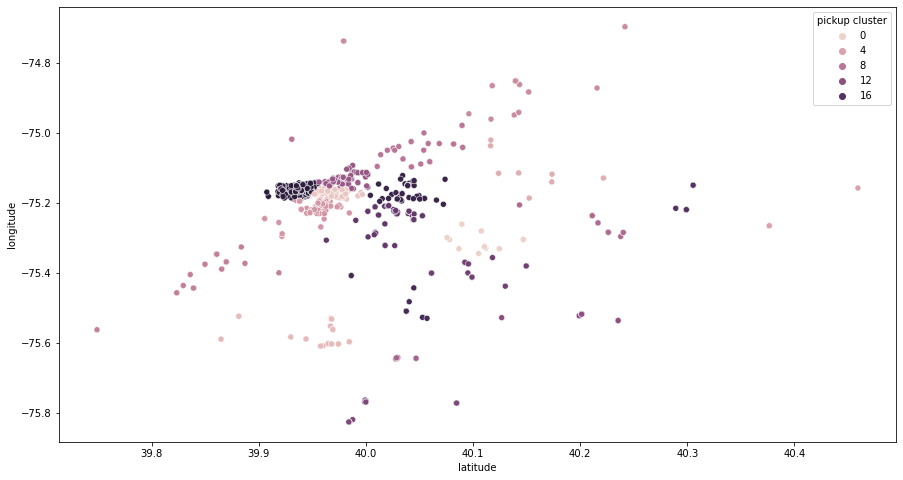

In [18]:
plt.figure(figsize = (15,8))
sns.scatterplot(df_philly_address_co['latitude'], df_philly_address_co['longitude'], hue = df_philly_address_co['pickup cluster'])
plt.savefig("KMeans-cluster-philly.png")

In [19]:
kmeans = KMeans(20)
clusters = kmeans.fit_predict(df_york_address_co[['latitude','longitude']])
df_york_address_co['pickup cluster'] = kmeans.predict(df_york_address_co[['latitude','longitude']])

/opt/anaconda3/envs/Geo_pandas37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


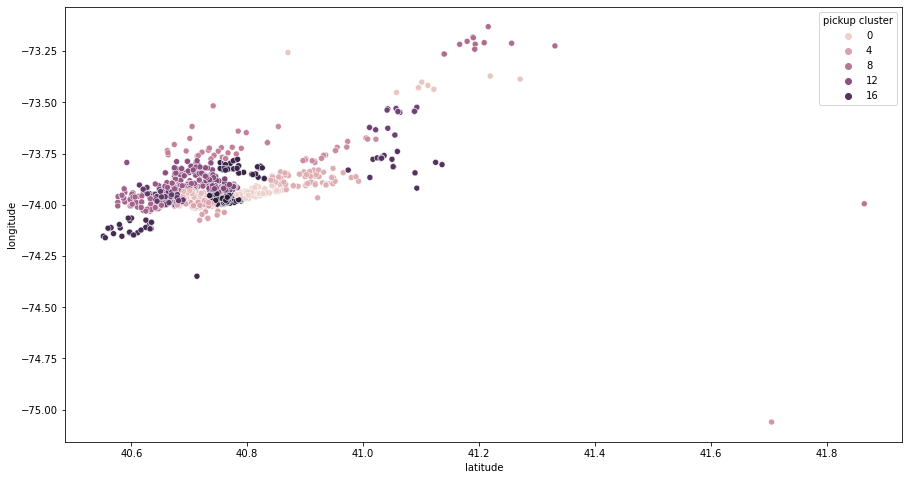

In [20]:
plt.figure(figsize = (15,8))
sns.scatterplot(df_york_address_co['latitude'], df_york_address_co['longitude'], hue = df_york_address_co['pickup cluster'])
plt.savefig("KMeans-cluster-newyork.png")
#plt.xlim(40.5, 41.5)
#plt.ylim(-74.5, -73)

In [21]:
df_york_address_co = df_york_address_co.drop(columns = ['latitude','longitude'])
df_philly_address_co = df_philly_address_co.drop(columns = ['latitude','longitude'])

# Some exploratory 

Here I try to explore further , though I did som exploratory data analysis during data cleaning. I have made some plots showing some comparison for two different cities.

In [22]:
df_york_address_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2321 entries, 0 to 2321
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_prices      2321 non-null   float64
 1   sqfts            2321 non-null   float64
 2   bedroom_counts   2321 non-null   float64
 3   post_timing      2321 non-null   object 
 4   No_of_bathrooms  2321 non-null   float64
 5   pet              2321 non-null   object 
 6   laundry          2321 non-null   object 
 7   parking          2321 non-null   object 
 8   Apartment_type   2321 non-null   object 
 9   postcode         2321 non-null   object 
 10  pickup cluster   2321 non-null   int32  
dtypes: float64(4), int32(1), object(6)
memory usage: 208.5+ KB


In [23]:
df_philly_address_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1808 entries, 0 to 1813
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_prices      1808 non-null   float64
 1   sqfts            1808 non-null   float64
 2   bedroom_counts   1808 non-null   float64
 3   post_timing      1808 non-null   object 
 4   No_of_bathrooms  1808 non-null   float64
 5   pet              1808 non-null   object 
 6   laundry          1808 non-null   object 
 7   parking          1808 non-null   object 
 8   Apartment_type   1808 non-null   object 
 9   postcode         1808 non-null   object 
 10  pickup cluster   1808 non-null   int32  
dtypes: float64(4), int32(1), object(6)
memory usage: 162.4+ KB


### Apartment type comparison between two cities
Both cities has maximum number of listings for multi group which includes apartment, condo, flat, loft, manufactured, assisted living 
compare to other types. There is no big difference in percentage in multi listings for two cities, but in case of single type philly has more percentage of listings than Newyork. And it makes sense compare to Newyork there are more single type housing available in Philadelphia.

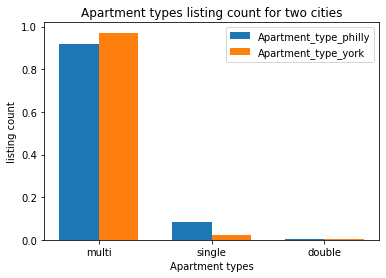

In [24]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


index = np.arange(3)
bar_width = 0.35

fig, ax = plt.subplots()
philly_apt = ax.bar(index, df_philly_address_co["Apartment_type"].value_counts(normalize = True), bar_width,
                label= "Apartment_type_philly")

york_apt = ax.bar(index+bar_width, df_york_address_co["Apartment_type"].value_counts(normalize = True),
                 bar_width, label= "Apartment_type_york")

ax.set_xlabel('Apartment types')
ax.set_ylabel('listing count')
ax.set_title('Apartment types listing count for two cities')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["multi", "single", "double"])
ax.legend()
plt.savefig("Apartment_types_in_two_cities.png")

plt.show()

### Comparison of apartment with pets
The no pets to both pets ratio is  higher in Newyork than in philadelphia. The newyork listings has higher nuber of no pets allowed like more than double. 
Cat is allowed more in Philadelphia than Newyork. The number of dogs allowed listings are less compare to just cats.

/opt/anaconda3/envs/Geo_pandas37/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


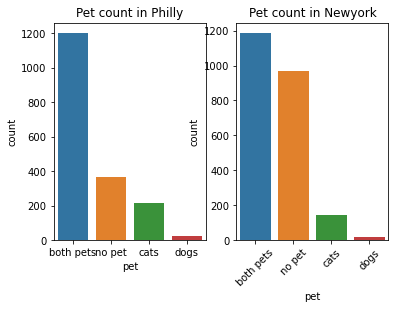

In [25]:
fig, ax =plt.subplots(1,2)
sns.countplot(x = df_philly_address_co['pet'], ax=ax[0])
ax[0].set_title("Pet count in Philly")
plt.savefig("pets_philly.png")
plt.xticks(rotation=45)

sns.countplot(x = df_york_address_co['pet'], ax=ax[1])
plt.title("Pet count in Newyork")
plt.savefig("pets_Newyork.png")
fig.show()

### Pets in different Apartment Type in Philly and Newyork
I want to see the different apartment types group by the pets for two different cities. There is big difference seen between two cities, Phialdephia has bigger percentage for multi and single that allows both pets. In case of Newyork the  bigger percentage of multi will allow pets but there is huge percentage of single that doesn't allow pets.


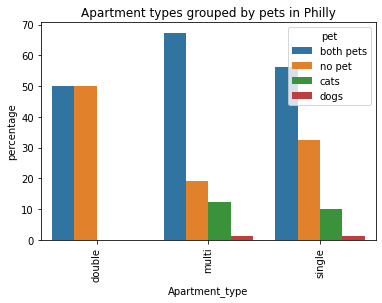

In [26]:
occupation_counts = df_philly_address_co.groupby(['Apartment_type'])['pet'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('Apartment_type')
p = sns.barplot(x="Apartment_type", y="percentage", hue="pet", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90) 
plt.title("Apartment types grouped by pets in Philly")
plt.savefig("Apartment types grouped by pets in Philly")

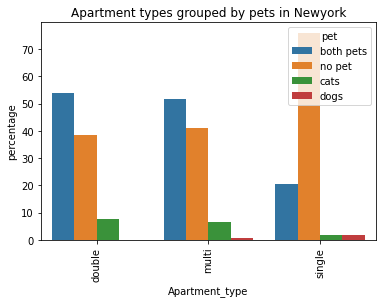

In [27]:
occupation_counts = df_york_address_co.groupby(['Apartment_type'])['pet'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('Apartment_type')
p = sns.barplot(x="Apartment_type", y="percentage", hue="pet", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.title("Apartment types grouped by pets in Newyork")
plt.savefig("Apartment types grouped by pets in Newyork")

#### Histogram for price and Apartment size

I am interested to see the histogram for the listings for two different cities based on the listings prices. It is difficult to come to any conclusion for two different cities. But comparatively the Newyork price is higher than the Philadelphia. I also try to build the histogram of the area in sqft. This is just opposite to post prices. The sqfts in Newyork listings is smaller than the Philadelphia.

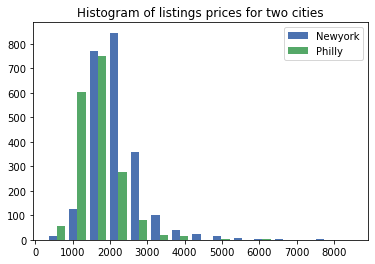

In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
plt.hist([df_york_address_co['post_prices'], df_philly_address_co['post_prices']], label=['Newyork', 'Philly'], bins = 15)
plt.legend(loc='upper right')
plt.title("Histogram of listings prices for two cities")
plt.savefig("Histogram of listings prices for two cities.png")
plt.show()

##### Histogram for post price looks similar for both philly and Newyork

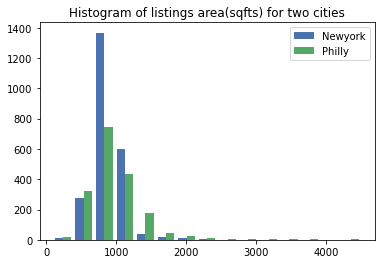

In [29]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
plt.hist([df_york_address_co['sqfts'], df_philly_address_co['sqfts']], label=['Newyork', 'Philly'], bins = 15)
plt.legend(loc='upper right')
plt.title("Histogram of listings area(sqfts) for two cities")
plt.savefig("Histogram of listings area(sqfts) for two cities.png")
plt.show()

## Bathroom number in three different type of apartment in Philly

I try to see the number of bathroom for differnt apartment types. The multi and single type housing listings has shown variation in the bathroom numbers. Must multi has 1 bathroom followed by 2.

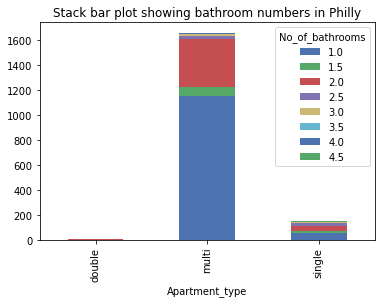

In [30]:
df_philly_address_co.groupby(['Apartment_type','No_of_bathrooms']).size().unstack().plot(kind='bar',stacked=True)
plt.title("Stack bar plot showing bathroom numbers in Philly")
plt.savefig("Stack bar plot showing bathroom numbers_philly.png")
plt.show()

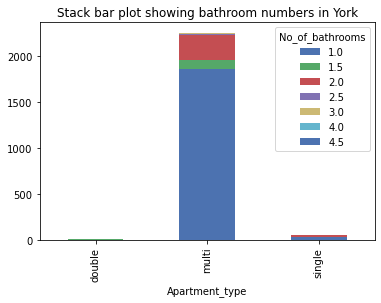

In [31]:
df_york_address_co.groupby(['Apartment_type','No_of_bathrooms']).size().unstack().plot(kind='bar',stacked=True)
plt.title("Stack bar plot showing bathroom numbers in York")
plt.savefig("Stack bar plot showing bathroom numbers_york.png")
plt.show()

#### Both cities seem to have the single bathroom common for all type of apartment except for double or duplex type of apartment

## Parking

#### I did the typo while webscraping so I am fixing the typo

Most of the listings doesn't have parking facility in both the cities and Newyork being biggest has no parking than the Phildelphia. The second percentage of listings has the off-street parking and only few has protected parking facility.

In [32]:
df_philly_address_co.loc[df_philly_address_co['parking']=='proctected', 'parking'] = 'protected'
df_york_address_co.loc[df_york_address_co['parking']=='proctected', 'parking'] = 'protected'

In [33]:
df_york_address_co['parking'].value_counts()

no            1897
off-street     212
protected      209
valet            3
Name: parking, dtype: int64

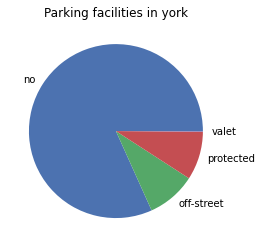

In [34]:
sums = df_york_address_co.parking.value_counts()
plt.pie(sums, labels=sums.index)
plt.title("Parking facilities in york")
plt.savefig("Parking facilities in york.png")
plt.show()

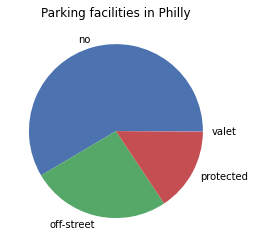

In [35]:
sums = df_philly_address_co.parking.value_counts()
plt.pie(sums, labels=sums.index)
plt.title("Parking facilities in Philly")
plt.savefig("Parking facilities in Philadelphia.png")
plt.show()

I want to see the parking facility for different apartment types. Single and Multi types are among the biggest percentage without parking. Both cities has similar variation of the parking facilities for different housing types. 

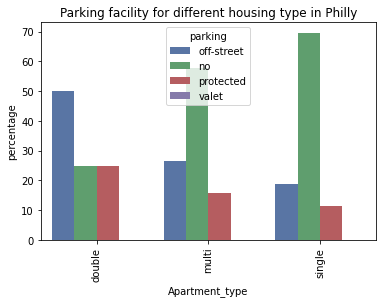

In [36]:
occupation_counts = df_philly_address_co.groupby(['Apartment_type'])['parking'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('Apartment_type')
p = sns.barplot(x="Apartment_type", y="percentage", hue="parking", data=occupation_counts)
plt.title("Parking facility for different housing type in Philly")
plt.savefig("Parking facility for different housing type in Philly.png")
_ = plt.setp(p.get_xticklabels(), rotation=90)

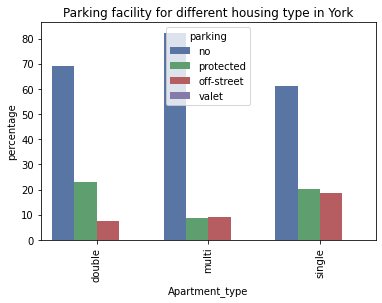

In [37]:
occupation_counts = df_york_address_co.groupby(['Apartment_type'])['parking'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('Apartment_type')
p = sns.barplot(x="Apartment_type", y="percentage", hue="parking", data=occupation_counts)
plt.title("Parking facility for different housing type in York")
plt.savefig("Parking facility for different housing type in York.png")
_ = plt.setp(p.get_xticklabels(), rotation=90)

Both cities have  very few proctected parking housing list

### Distribution of mean post price according to different Zipcodes.

In [38]:
df_york_address_co.head()

,post_prices,sqfts,bedroom_counts,post_timing,No_of_bathrooms,pet,laundry,parking,Apartment_type,postcode,pickup cluster
0,2842.0,717.674641,1.0,2021-02-18 16:47,1.5,both pets,on site,no,multi,10005,4
1,1400.0,497.934783,0.0,2021-02-18 16:45,1.0,no pet,on site,off-street,multi,11435,12
2,1100.0,717.674641,1.0,2021-02-18 16:45,1.0,no pet,no laundry,protected,multi,06614,9
3,1850.0,922.373057,2.0,2021-02-18 16:44,1.5,both pets,no laundry,no,multi,11206,2
4,2084.0,922.373057,2.0,2021-02-18 16:37,1.0,no pet,on site,no,multi,10005,4


The below plot shows the number of listings as per the zipcode. We can clearly visualize the listings number is different for diferent zipcodes and few zipcodes with maximum listings.

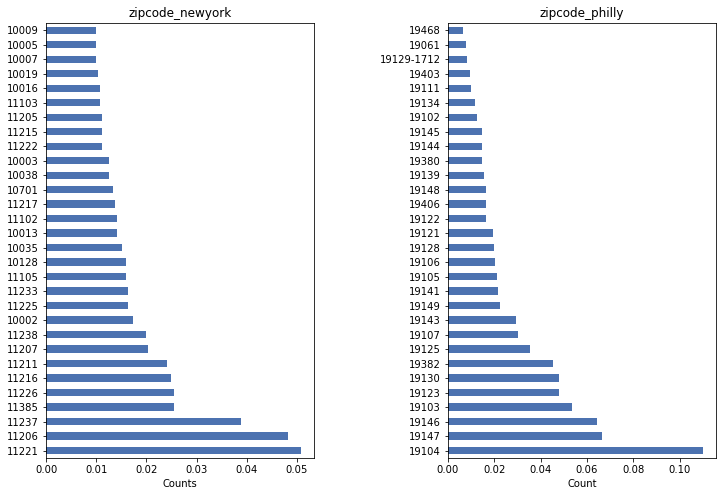

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
df_york_address_co.postcode.value_counts(normalize = True)[:30].plot(kind='barh', ax=ax[0])
ax[0].set_title('zipcode_newyork')
ax[0].set_xlabel('Counts')
#ax[0].savefig('zipcode_newyork_price.png')
df_philly_address_co.postcode.value_counts(normalize = True)[:30].plot(kind='barh', ax=ax[1])
ax[1].set_title('zipcode_philly')
ax[1].set_xlabel('Count')
#ax[1].savefig('zipcode_philly_price.png')
plt.savefig('zipcode_newyork_and_Philly_price.png')
plt.subplots_adjust(wspace=0.5);

In [40]:
zipcode_price_means_york = df_york_address_co.groupby('postcode')['post_prices'].mean()
zipcode_price_means_philly = df_philly_address_co.groupby('postcode')['post_prices'].mean()

In [41]:
zipcode_price_means_philly

postcode
08002    3968.333333
08060    1287.500000
08619    2581.500000
18901    1635.000000
18914    1835.400000
            ...     
19454    1689.555556
19460    1295.000000
19462    1207.500000
19468    1755.833333
19806     950.000000
Name: post_prices, Length: 112, dtype: float64

In [42]:
zipcode_price_means_york

postcode
06468    1850.0
06604    1700.0
06605    1900.0
06606    1175.0
06608    1250.0
          ...  
11692    1900.0
11754    1600.0
11756    1200.0
12487    1000.0
12726     775.0
Name: post_prices, Length: 238, dtype: float64

We want to visualize the variaton in the post prices as per the zipcode. We can clearly see there is some differences among the cities with different code and the expenses in the housing price. 

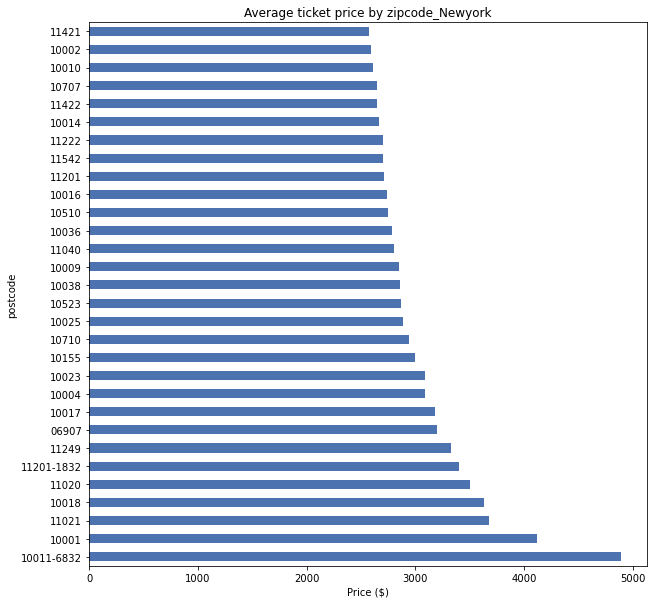

In [45]:
zipcode_price_means_york.sort_values(ascending=False)[:30].plot(kind='barh', figsize=(10, 10), title='Average ticket price by zipcode_Newyork')
plt.savefig("Mean post price for zipcodes_newyork.png")
plt.xlabel('Price ($)');


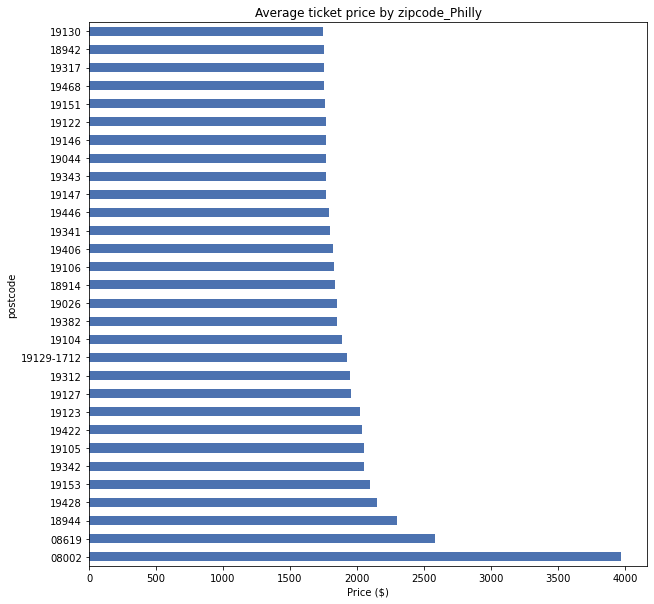

In [46]:
zipcode_price_means_philly.sort_values(ascending=False)[:30].plot(kind='barh', figsize=(10, 10), title='Average ticket price by zipcode_Philly')
plt.savefig("Mean post price for zipcodes_philly.png")
plt.xlabel('Price ($)');

#### save data for preprocessing and model training

In [107]:
df_philly_address_co.to_csv("df_philly_model.csv")
df_york_address_co.to_csv("df_york_model.csv")